In [143]:
import numpy as np
from sklearn import datasets

import torch
import torch.nn as nn
import torch.optim as optim

import torchbnn as bnn

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline

tensor([[-2.0000e+00, -5.9701e+00],
        [-1.9920e+00, -5.7921e+00],
        [-1.9840e+00, -6.8761e+00],
        [-1.9760e+00, -5.0168e+00],
        [-1.9679e+00, -5.9243e+00],
        [-1.9599e+00, -4.8173e+00],
        [-1.9519e+00, -5.4793e+00],
        [-1.9439e+00, -5.3017e+00],
        [-1.9359e+00, -5.2666e+00],
        [-1.9279e+00, -4.0316e+00],
        [-1.9198e+00, -6.1487e+00],
        [-1.9118e+00, -5.0153e+00],
        [-1.9038e+00, -4.9442e+00],
        [-1.8958e+00, -5.8548e+00],
        [-1.8878e+00, -4.1084e+00],
        [-1.8798e+00, -4.1047e+00],
        [-1.8717e+00, -4.9958e+00],
        [-1.8637e+00, -3.8436e+00],
        [-1.8557e+00, -3.8957e+00],
        [-1.8477e+00, -4.9292e+00],
        [-1.8397e+00, -5.8654e+00],
        [-1.8317e+00, -3.7122e+00],
        [-1.8236e+00, -4.6868e+00],
        [-1.8156e+00, -4.3353e+00],
        [-1.8076e+00, -4.8161e+00],
        [-1.7996e+00, -2.9535e+00],
        [-1.7916e+00, -3.6431e+00],
        [-1.7836e+00, -4.696

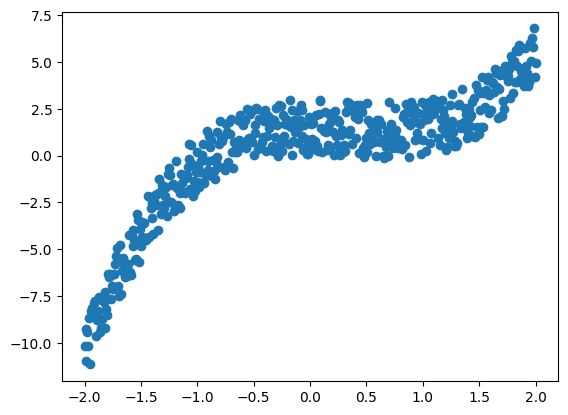

In [145]:
x = torch.linspace(-2, 2, 500)
#z = torch.linspace(-2, 2, 500)
y = x.pow(3) - x.pow(2) + 3*torch.rand(x.size())

z = x.pow(3)+ (torch.rand(x.size())).pow(2) + 3*torch.rand(x.size())

x = torch.unsqueeze(x, dim=1)
y = torch.unsqueeze(y, dim=1)
z = torch.unsqueeze(z,dim=1)

input=torch.hstack((x,z))

print(input)
print(z)
print(x)


plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()


In [146]:
#iris = datasets.load_iris()
#X = iris.data
#Y = iris.target 
#print(X)
#print(Y)
#x, y = torch.from_numpy(X).long(), torch.from_numpy(Y).long()
#print(x,y)
#x.shape, y.shape
#inp = torch.cat((x,z),1)
#print(inp)

In [147]:
#2 layer BNN 

model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=2, out_features=150),
    nn.Tanh(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=150, out_features=1),
)

In [148]:
mse_loss = nn.MSELoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.SGD(model.parameters(), lr=0.01)

In [149]:
kl_weight = 0.1

In [150]:
for step in range(3000):
    pre = model(input)
    mse = mse_loss(pre, y)
    kl = kl_loss(model)
    cost = mse + kl_weight*kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
print('- MSE : %2.2f, KL : %2.2f' % (mse.item(), kl.item()))

- MSE : 1.02, KL : 2.78


In [151]:
#x_test = torch.linspace(-2, 2, 500)
#y_test = x_test.pow(3) - x_test.pow(2) + 3*torch.rand(x_test.size())
#
#x_test = torch.unsqueeze(x_test, dim=1)
#y_test = torch.unsqueeze(y_test, dim=1)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (500x1 and 2x150)

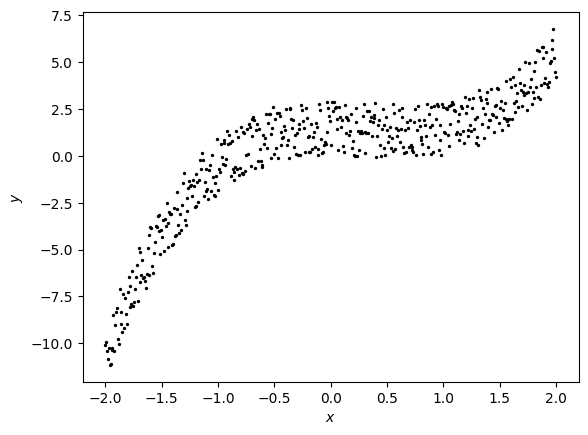

In [152]:
#plt.xlabel(r'$x$')
#plt.ylabel(r'$y$')
#
#plt.scatter(x_test.data.numpy(), y_test.data.numpy(), color='k', s=2) 
#
#y_predict = model(x_test)
#plt.plot(x_test.data.numpy(), y_predict.data.numpy(), 'r-', linewidth=5, label='First Prediction')
#
#y_predict = model(x_test)
#plt.plot(x_test.data.numpy(), y_predict.data.numpy(), 'b-', linewidth=5, label='Second Prediction')
#
#y_predict = model(x_test)
#plt.plot(x_test.data.numpy(), y_predict.data.numpy(), 'g-', linewidth=5, label='Third Prediction')
#
#plt.legend()
#
#plt.show()